## Cómo lidiar con el output del modelo WRF

#### (y de paso cómo calcular Parámetro de Scorer)

Output del Dominio 2 del pronóstico operativo del grupo IOA: 
http://grupo-ioa.atmosfera.unam.mx/pronosticos/index.php/meteorologia

Info modelo: http://grupo-ioa.atmosfera.unam.mx/pronosticos/index.php/meteorologia/inf-wrf

In [1]:
# cargar las bibliotecas que usaremos
import cmocean as cmo 
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import numpy as np
import seaborn as sns
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

In [2]:
# opción para generar gráficas para pláticas (con letras grandes y líneas gordas)
sns.set_context('talk')

In [4]:
# un archivo del output de modelo wrf
filename = 'wrfout_d02_2021-12-19_00.nc'

# cargar DataFrame con xarray
ds = xr.open_dataset(filename)

In [5]:
# Veamos qué hay dentro
ds

<xarray.Dataset>
Dimensions:    (Time: 121, bottom_top: 49, bottom_top_stag: 50, soil_layers_stag: 4, south_north: 156, south_north_stag: 157, west_east: 273, west_east_stag: 274)
Coordinates:
    XLAT       (Time, south_north, west_east) float32 ...
    XLONG      (Time, south_north, west_east) float32 ...
    XTIME      (Time) datetime64[ns] ...
    XLAT_U     (Time, south_north, west_east_stag) float32 ...
    XLONG_U    (Time, south_north, west_east_stag) float32 ...
    XLAT_V     (Time, south_north_stag, west_east) float32 ...
    XLONG_V    (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times      (Time) |S19 ...
    LU_INDEX   (Time, south_north, west_east) float32 ...
    ZNU        (Time, bottom_top) float32 ...
    ZNW        (Time, bottom_top_stag) float32 ...
    ZS         (Time, soil_layers_stag) float32 ...
    DZS        (Time, soil_layers_stag) float32 ...
    VAR_SSO    (Time, south_north, west_east) float32 ...
    U          (Time, bottom_top, south_north, west_east_stag) float32 ...
    V          (Time, bottom_top, south_north_stag, west_east) float32 ...
    W          (Time, bottom_top_stag, south_north, west_east) float32 ...
    PH         (Time, bottom_top_stag, south_north, west_east) float32 ...
    PHB        (Time, bottom_top_stag, south_north, west_east) float32 ...
    T          (Time, bottom_top, south_north, west_east) float32 ...
    P          (Time, bottom_top, south_north, west_east) float32 ...
    PB         (Time, bottom_top, south_north, west_east) float32 ...
    DNW        (Time, bottom_top) float32 ...
    DN         (Time, bottom_top) float32 ...
    P_HYD      (Time, bottom_top, south_north, west_east) float32 ...
    Q2         (Time, south_north, west_east) float32 ...
    T2         (Time, south_north, west_east) float32 ...
    TH2        (Time, south_north, west_east) float32 ...
    PSFC       (Time, south_north, west_east) float32 ...
    U10        (Time, south_north, west_east) float32 ...
    V10        (Time, south_north, west_east) float32 ...
    ZETATOP    (Time) float32 ...
    ITIMESTEP  (Time) int32 ...
    QVAPOR     (Time, bottom_top, south_north, west_east) float32 ...
    QCLOUD     (Time, bottom_top, south_north, west_east) float32 ...
    QRAIN      (Time, bottom_top, south_north, west_east) float32 ...
    QNRAIN     (Time, bottom_top, south_north, west_east) float32 ...
    SHDMAX     (Time, south_north, west_east) float32 ...
    SHDMIN     (Time, south_north, west_east) float32 ...
    TSLB       (Time, soil_layers_stag, south_north, west_east) float32 ...
    SMOIS      (Time, soil_layers_stag, south_north, west_east) float32 ...
    SH2O       (Time, soil_layers_stag, south_north, west_east) float32 ...
    VEGFRA     (Time, south_north, west_east) float32 ...
    VAR        (Time, south_north, west_east) float32 ...
    MAPFAC_M   (Time, south_north, west_east) float32 ...
    MAPFAC_U   (Time, south_north, west_east_stag) float32 ...
    MAPFAC_V   (Time, south_north_stag, west_east) float32 ...
    F          (Time, south_north, west_east) float32 ...
    E          (Time, south_north, west_east) float32 ...
    HGT        (Time, south_north, west_east) float32 ...
    TSK        (Time, south_north, west_east) float32 ...
    P_TOP      (Time) float32 ...
    T00        (Time) float32 ...
    P00        (Time) float32 ...
    RAINC      (Time, south_north, west_east) float32 ...
    RAINNC     (Time, south_north, west_east) float32 ...
    CLDFRA     (Time, bottom_top, south_north, west_east) float32 ...
    SWDOWN     (Time, south_north, west_east) float32 ...
    GLW        (Time, south_north, west_east) float32 ...
    OLR        (Time, south_north, west_east) float32 ...
    ALBEDO     (Time, south_north, west_east) float32 ...
    XLAND      (Time, south_north, west_east) float32 .

Hay muchísimas variables. 

* 21 récords de tiempo, cada 3 horas (del 2020-01-17_00:00:00 al 2020-01-22_00:00:00)
* Lon va de -106.14471 a -93.100395 W.
* Lat va de 14.568531 a 21.628664 N.

Veamos cuál es el Dominio y elevación del terreno (Dominio 2 del modelo IOA)

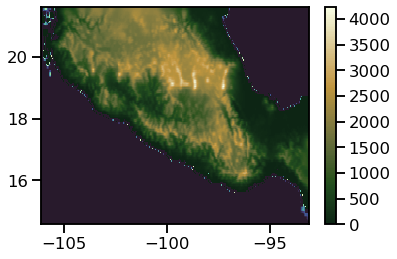

In [6]:
pc = plt.pcolormesh(ds.XLONG[0,:,:],ds.XLAT[0,:,:], ds.HGT[0,:,:], 
                    norm=TwoSlopeNorm(0.05), cmap=cmo.cm.topo,)
plt.colorbar(pc)

1000 4233


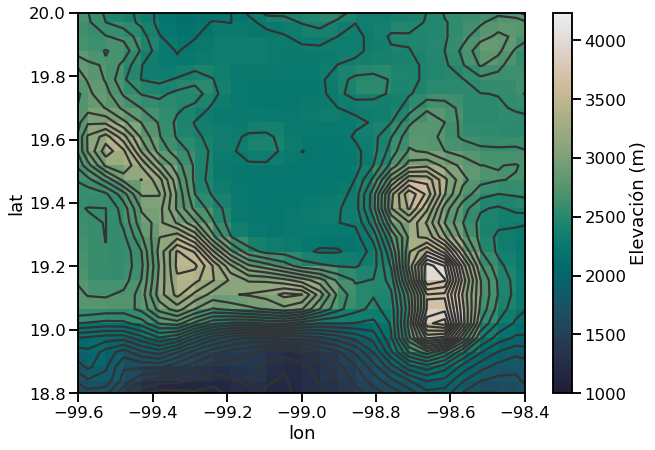

In [7]:
# Zoom al Valle de México - resolución 5 km resolution. 
# Esta resolución es un poco baja pero por el momento está bien

# definir límites de barra de color
max_hgt = np.nanmax(ds.HGT[0,:,:])
min_hgt = 1000

# Graficar
fig, ax = plt.subplots(1,1, figsize=(10,7))
pc = ax.pcolormesh(ds.XLONG[0,:,:],ds.XLAT[0,:,:], ds.HGT[0,:,:], 
                   vmin=min_hgt, vmax = max_hgt, cmap = cmo.cm.rain_r)
plt.colorbar(pc, label='Elevación (m)')

# Contornos
cn = ax.contour(ds.XLONG[0,:,:],ds.XLAT[0,:,:], ds.HGT[0,:,:], 
                levels=np.linspace(int(min_hgt),int(max_hgt),30), colors='0.2')

# Definir límites del zoom
ax.set_xlim(-99.6, -98.4)
ax.set_ylim(18.8, 20)
ax.set_xlabel('lon')
ax.set_ylabel('lat')

print(int(min_hgt), int(max_hgt))

### Altura de los niveles verticales

Ver esta respuesta: https://mailman.ucar.edu/pipermail/wrf-users/2010/002009.html

PH y PHB son los geopotenciales perturbados y en estado base, respectivamente.

La respuesta dice: "PH and PHB are staggered in the Z direction, meaning that they are at the tops and bottoms of grid cells. That is fine for the heights of vertical
winds, but for horizontal winds, other prognostic variables, and most
diagnostic variables, the center of the cell should be used. You can average
the top and bottom to get the center. 

For the cell at vertical level 'k, height above sea level is:

     (((PH(k)+PH(k+1)) / 2) + ((PHB(k)+(PHB(k+1)) / 2) / 9.81"

In [8]:
# Sin staggering, la altura sobre el nivel del mar al tiempo 0 es:
hght_asl = (ds.PH[0,...]+ds.PHB[0,...])/9.81

Text(0.5, 1.0, 'Nivel vertical 0')

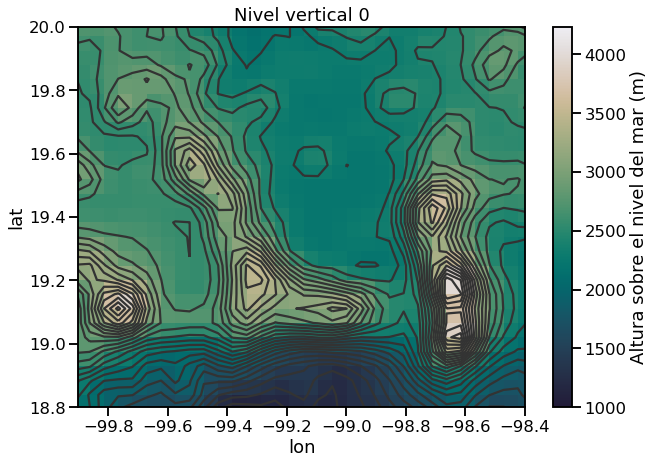

In [9]:
k = 0 # nivel vertical del fondo (el más pegado a la superficie)

# definimos límites colormap
max_hgt = np.nanmax(hght_asl[k,:,:])
min_hgt = 1000

# Graficamos altura sobre nivel del mar del nivel k=0 al tiempo t=0.
fig, ax = plt.subplots(1,1, figsize=(10,7))
pc = ax.pcolormesh(ds.XLONG[k,:,:],ds.XLAT[k,:,:], hght_asl[k,:,:], 
                   vmin=min_hgt, vmax = max_hgt, cmap = cmo.cm.rain_r)
plt.colorbar(pc, label='Altura sobre el nivel del mar (m)')
cn = ax.contour(ds.XLONG[k,:,:],ds.XLAT[k,:,:], hght_asl[k,:,:], 
                levels=np.linspace(int(min_hgt),int(max_hgt),30), colors='0.2')

ax.set_xlim(-99.9, -98.4)
ax.set_ylim(18.8, 20)
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_title('Nivel vertical %i' %k)

1000 4233


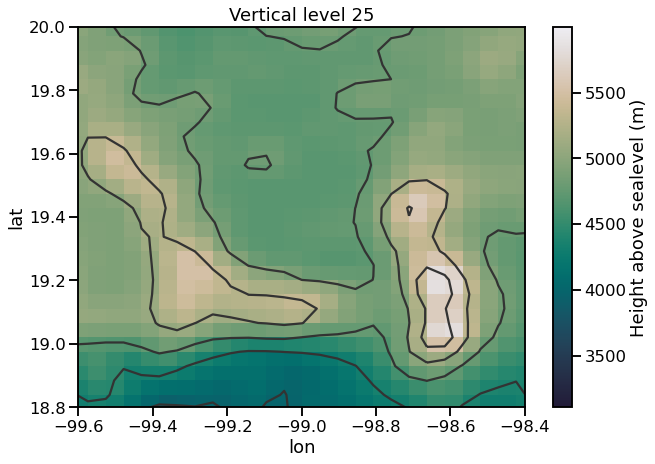

In [10]:
k = 25 # Último nivel vertical (el más alejado del piso) 
t = 0 # tiempo inicial

# definimos límites de mapa de color
#max_hgt = np.nanmax(hght_asl[k,:,:])
#min_hgt = max_hgt*0.991

# graficamos
fig, ax = plt.subplots(1,1, figsize=(10,7))
pc = ax.pcolormesh(ds.XLONG[t,:,:],ds.XLAT[t,:,:], hght_asl[k,:,:], 
                   #vmin=min_hgt, vmax = max_hgt, 
                   cmap = cmo.cm.rain_r)
plt.colorbar(pc, label='Height above sealevel (m)')
cn = ax.contour(ds.XLONG[t,:,:],ds.XLAT[t,:,:], hght_asl[k,:,:], 
                #levels=np.linspace(int(min_hgt),int(max_hgt),30), 
                colors='0.2')

ax.set_xlim(-99.6, -98.4)
ax.set_ylim(18.8, 20)
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_title('Vertical level %i' %k)

print(int(min_hgt), int(max_hgt))

Estas coordenadas verticales son "terrain following" o coordenadas que siguen a la topografía.

Veamos cómo varía la altura de los niveles verticales a lo largo de un corte longitudinal:

Text(0.5, 1.0, 'Height vertical levels at 19.4 N')

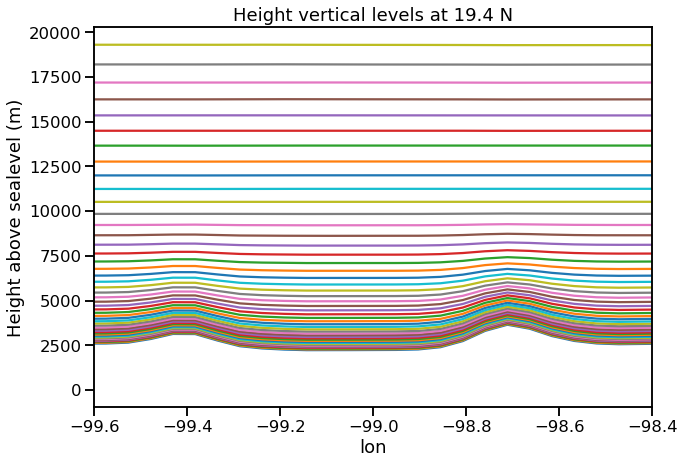

In [11]:
ilat = 106  # Elegimos un índice de latitud

fig, ax = plt.subplots(1,1, figsize=(10,7))
for level in range(49):
    ax.plot(ds.XLONG[t,ilat,:],hght_asl[level,ilat,:])

ax.set_xlim(-99.6, -98.4)
ax.set_xlabel('lon')
ax.set_ylabel('Height above sealevel (m)')
ax.set_title('Height vertical levels at %1.1f N'%ds.XLAT[0,ilat,0])

### Graficar secciones transversales respecto a la altura

Ahora, para poder graficar los distintos campos (U, V, W, T, etc) necesitamos saber la altura de cada nivel vertical en cada punto de la malla horizontal. Eso no es tarea fácil pero, por suerte, existen algunas funciones de la biblioteca **wrf** que nos pueden auxiliar en el cálculo. 

Documentación: https://wrf-python.readthedocs.io/en/latest/

Les recomiendo instalarlo usando conda: `conda install -c conda-forge wrf-python`

Hay más opciones en la documentación.

Necesitan instalar también **cartopy**: `conda install -c conda-forge cartopy`


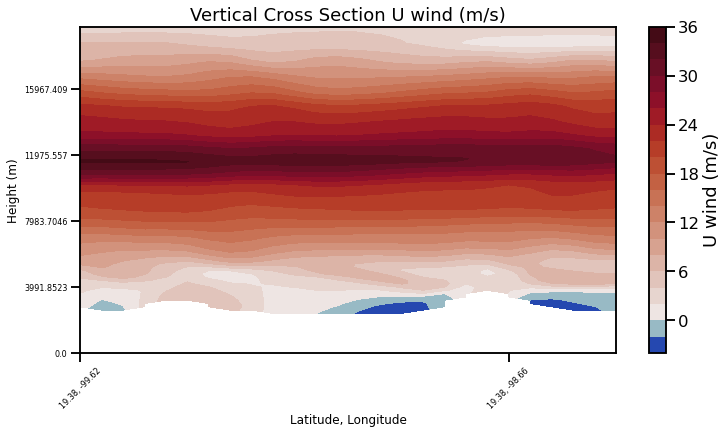

In [12]:
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from matplotlib.cm import get_cmap
from netCDF4 import Dataset
from wrf import to_np, getvar, CoordPair, vertcross, interpline

# Abrir archivo NetCDF (pueden hacer algo similar usando xarray si lo prefieren)
filename = filename # ya teníamos definido el nombre del archivo 
ncfile = Dataset(filename)

# Extrae altura del modelo y velocidad del viento
z = getvar(ncfile, "z")
wspd =  getvar(ncfile, "ua", timeidx=20, units='m s-1')

# Crea el punto de partida y de término para la sección transversal
start_point = CoordPair(lat=19.4, lon=-99.6)
end_point = CoordPair(lat=19.4, lon=-98.4)

# Computa la interpolación de la sección transversal. También,
# incluye los puntos lat.lon a lo largo de la sección.
wspd_cross = vertcross(wspd, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

# Crea la figura
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Contour plot
wspd_contours = ax.contourf(to_np(wspd_cross),20, norm=TwoSlopeNorm(0.0), cmap=cmo.cm.balance)

# Agrega la barra de color
cb = plt.colorbar(wspd_contours, ax=ax, label='U wind (m/s)')

# Define los x-ticks para usar en latitud y longitud
coord_pairs = to_np(wspd_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_xticks(x_ticks[::20])
ax.set_xticklabels(x_labels[::20], rotation=45, fontsize=8)

# Define y-ticks para que sean alturas
vert_vals = to_np(wspd_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::20])
ax.set_yticklabels(vert_vals[::20], fontsize=8)

# Define las etiquetas del eje x y y
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)

plt.title("Vertical Cross Section U wind (m/s)")

plt.show()

Hagamos lo mismo para el viento meridional, V:

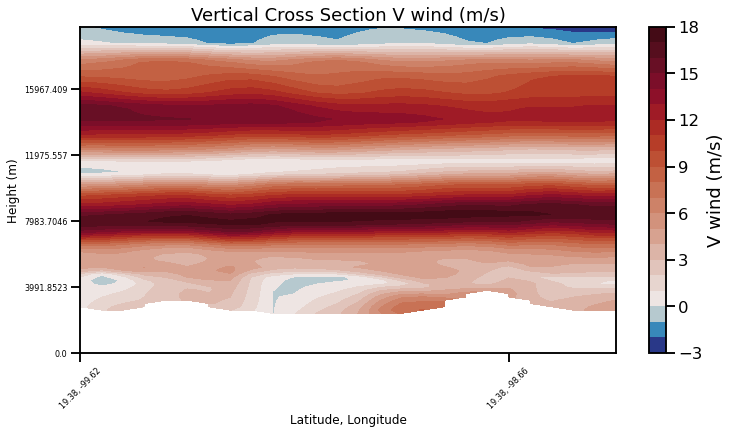

In [13]:
# Extract the model wind speed V
wspd =  getvar(ncfile, "va", timeidx=20, units='m s-1')

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
wspd_cross = vertcross(wspd, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

# Create the figure
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Make the contour plot
wspd_contours = ax.contourf(to_np(wspd_cross),20, norm=TwoSlopeNorm(0.0),
                            cmap=cmo.cm.balance)

# Add the color bar
plt.colorbar(wspd_contours, ax=ax, label='V wind (m/s)')

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(wspd_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_xticks(x_ticks[::20])
ax.set_xticklabels(x_labels[::20], rotation=45, fontsize=8)

# Set the y-ticks to be height.
vert_vals = to_np(wspd_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::20])
ax.set_yticklabels(vert_vals[::20], fontsize=8)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)

plt.title("Vertical Cross Section V wind (m/s)")

plt.show()

### Intermedio: Cálculo del parámetro de Scorer

Ahora que sabemos lidiar con las coordenadas verticales, hagámos algunos cálculos. Para eso definimos las funciones siguientes: 

In [14]:
def calc_curvature(U,z):
    '''Calculate second derivative of U wrt z'''
    d2Udz2 = (U[2:,...] - 2*U[1:-1,...] + U[0:-2,...]) / ((z[2:,...]-z[1:-1,...])*(z[1:-1,...]-z[0:-2,...]))
    return d2Udz2

def calc_scorer(N2,U,z):
    '''Calculate Scorer parameter on a 2D array'''
    d2Udz2 = calc_curvature(U,z) 
    l2 = (N2/U[1:-1,...]**2) - (1/U[1:-1,...])*(d2Udz2) #
    return(l2)
    
def calc_N2(theta,theta_ref, z, g=9.81):
    '''Calculate Brunt-Vaisala frequency in the Boussinesq limit
    Input: theta: basis state potential temperature
           theta_ref: constant reference potential temperature
           z: height array
           g: gravitational acceleration, default value is 9.81 msˆ{-2}
    Output: N2: squared Brunt-Vaisala frequency calulated as 
                Nˆ2 = (g/theta_ref)*(\partial theta/\partial z) 
    '''
    N2 = (g/theta_ref)*(theta[2:,...] - theta[0:-2,...])/((z[2:,...]-z[1:-1,...])+(z[1:-1,...]-z[0:-2,...]))
    return N2


In [ ]:
x=calc_curvature(

Text(0, 0.5, 'z-index')

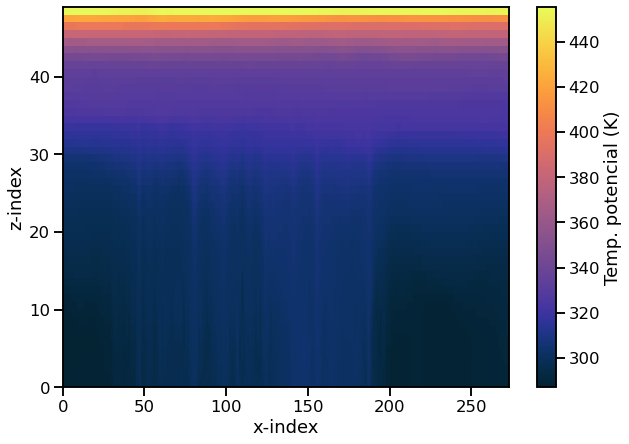

In [15]:
# Primero, veamos rápidamente como se ve la temperatura en una sección transversal
# La variable que usaremos es T, perturbation potential temperature (theta-t0),
# por eso le sumamos theta0=290K

ilat = 106 # elegimos indice y 
fig, ax = plt.subplots(1,1, figsize=(10,7))

pc = ax.pcolormesh(ds.T[0,:,ilat,:].data+290, cmap=cmo.cm.thermal)
plt.colorbar(pc, label= 'Temp. potencial (K)')
ax.set_xlabel('x-index')
ax.set_ylabel('z-index')

Text(0, 0.5, 'altura (m)')

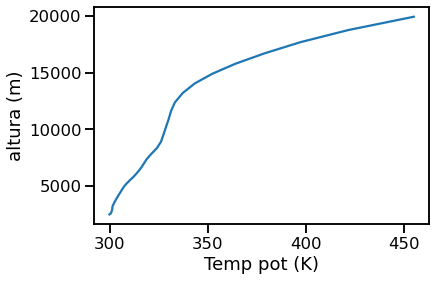

In [16]:
# Tomemos un perfil vertical, ie. en una celda ilat, ilon:

z = getvar(ncfile, "z")
ilon = 100
plt.plot(ds.T[0,:,ilat,ilon].data+290, z[:,ilat,ilon])
plt.xlabel('Temp pot (K)')
plt.ylabel('altura (m)')

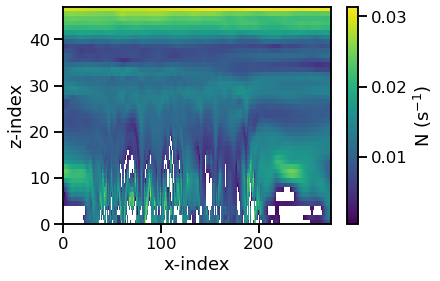

In [17]:
# Calulemos la frecuencia de Brunt-Väisälä para un transecto
N2 = calc_N2(ds.T[0,:,:,:].data, 290, z[:,:,:] )

pc = plt.pcolormesh(np.sqrt(N2[:,ilat,:]))
plt.colorbar(pc, label='N (s$^{-1}$)')
plt.xlabel('x-index')
plt.ylabel('z-index')
plt.show()

In [18]:
N2

<xarray.DataArray 'height' (bottom_top: 47, south_north: 156, west_east: 273)>
array([[[ 7.28958821e-06, -4.14443832e-07, -8.33270769e-06, ...,
         -2.44875118e-05, -2.37086751e-05, -2.29531161e-05],
        [ 3.90364085e-06, -4.75438037e-06, -1.32813320e-05, ...,
         -2.52439477e-05, -2.43275645e-05, -2.34916970e-05],
        [-7.71466318e-07, -1.02335107e-05, -1.93802061e-05, ...,
         -2.59315148e-05, -2.49923323e-05, -2.40764166e-05],
        ...,
        [-5.43466886e-05, -5.49603465e-05, -5.53754144e-05, ...,
         -1.61311200e-05, -1.70666663e-05, -1.80829556e-05],
        [-5.37102023e-05, -5.39846515e-05, -5.40959954e-05, ...,
         -1.55661128e-05, -1.65708771e-05, -1.76334088e-05],
        [-5.30605903e-05, -5.28914061e-05, -5.25233772e-05, ...,
         -1.50240476e-05, -1.60864838e-05, -1.72066029e-05]],

       [[ 1.57811992e-05,  9.69543544e-06,  3.93460277e-06, ...,
         -6.15260069e-06, -6.17582236e-06, -6.14190867e-06],
        [ 1.28420579e-05,  6.70045847e-06,  1.04384924e-06, ...,
         -6.09520112e-06, -6.03842227e-06, -5.98165343e-06],
        [ 9.35270054e-06,  3.21242283e-06, -2.37440577e-06, ...,
         -5.96920108e-06, -5.93527648e-06, -5.83284464e-06],
...
          6.26334280e-04,  6.23095431e-04,  6.19568396e-04],
        [ 6.52511138e-04,  6.46736007e-04,  6.41450810e-04, ...,
          6.30460447e-04,  6.27103844e-04,  6.23378437e-04],
        [ 6.53818483e-04,  6.48446206e-04,  6.43464853e-04, ...,
          6.34459138e-04,  6.31089322e-04,  6.27284753e-04]],

       [[ 9.45422158e-04,  9.45840322e-04,  9.46615997e-04, ...,
          9.98712261e-04,  9.93780792e-04,  9.88975866e-04],
        [ 9.45894688e-04,  9.45898064e-04,  9.46279964e-04, ...,
          9.97296302e-04,  9.92343877e-04,  9.87583655e-04],
        [ 9.46789456e-04,  9.46428743e-04,  9.46450222e-04, ...,
          9.95944603e-04,  9.91045614e-04,  9.86409024e-04],
        ...,
        [ 8.64019559e-04,  8.60988337e-04,  8.58120387e-04, ...,
          9.16911755e-04,  9.15815996e-04,  9.15013778e-04],
        [ 8.63046909e-04,  8.60487635e-04,  8.58053972e-04, ...,
          9.18690697e-04,  9.17765603e-04,  9.17075144e-04],
        [ 8.61817796e-04,  8.59797292e-04,  8.57858628e-04, ...,
          9.20818013e-04,  9.20100952e-04,  9.19548620e-04]]],
      dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -106.14471 ... -93.100395
    XLAT     (south_north, west_east) float32 14.568527 14.568527 ... 21.628654
    XTIME    float32 0.0
    Time     datetime64[ns] 2021-12-19
Dimensions without coordinates: bottom_top, south_north, west_east

En algunos lugares no está definida N2 por la estructura de T.

In [19]:
# AHora, calculemos el parámetro de Scorer considerando el prefil de velocidad zonal (U)
uspd =  getvar(ncfile, "ua", timeidx=0, units='m s-1')
l2 = calc_scorer(N2, uspd[:,:,:], z[:,:,:])

In [31]:
a=calc_curvature(uspd[:,:,:],z[:,:,:])
l2.shape

(47, 156, 273)

Text(0, 0.5, 'y-index')

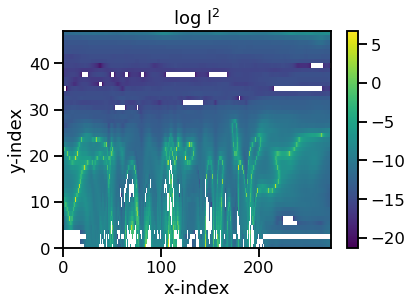

In [21]:
# Grafiquemos en escala log
pc = plt.pcolormesh(np.log(l2[:,ilat,:]))
plt.colorbar(pc)
plt.title('log l$^2$')
plt.xlabel('x-index')
plt.ylabel('y-index')

Text(0.5, 0, 'log(l$^2$)')

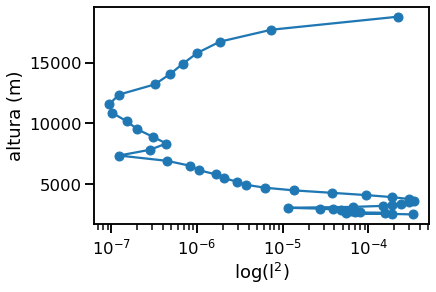

In [22]:
# Veamos un solo perfil de log(lˆ2)
plt.semilogx(l2[:,ilat,100], z[1:-1,ilat,100], 'o-')
plt.ylabel('altura (m)')
plt.xlabel('log(l$^2$)')

In [23]:
l2

<xarray.DataArray (bottom_top: 47, south_north: 156, west_east: 273)>
array([[[ 8.54803693e-06,  8.96391430e-06,  9.21300398e-06, ...,
          3.24963662e-06,  2.77657659e-06,  2.33927699e-06],
        [ 7.88256693e-06,  8.13131464e-06,  8.28909378e-06, ...,
          3.14927456e-06,  2.73013529e-06,  2.35781295e-06],
        [ 7.11937219e-06,  7.17004832e-06,  7.20002936e-06, ...,
          3.01910268e-06,  2.64977302e-06,  2.35311245e-06],
        ...,
        [-6.26196925e-06, -6.40033250e-06, -6.44658030e-06, ...,
          2.07681182e-07,  6.98013878e-08, -5.44071668e-08],
        [-5.80265032e-06, -5.96991140e-06, -6.03755552e-06, ...,
          1.56947294e-07,  2.28581030e-08, -1.00046066e-07],
        [-5.41805366e-06, -5.60023727e-06, -5.66717881e-06, ...,
          1.09539656e-07, -2.41835210e-08, -1.38002974e-07]],

       [[ 8.10653910e-06,  8.59853117e-06,  9.01926069e-06, ...,
          4.14812894e-06,  3.83086854e-06,  3.50813184e-06],
        [ 7.88484613e-06,  8.23002756e-06,  8.53329493e-06, ...,
          4.15055092e-06,  3.86960710e-06,  3.58566717e-06],
        [ 7.62095942e-06,  7.77756213e-06,  7.93025902e-06, ...,
          4.14280794e-06,  3.88628450e-06,  3.64666857e-06],
...
          6.89730041e-06,  7.05731236e-06,  7.21653714e-06],
        [ 1.80190364e-06,  1.76602202e-06,  1.73515991e-06, ...,
          6.71638736e-06,  6.86758631e-06,  7.01872113e-06],
        [ 1.83037798e-06,  1.78907692e-06,  1.75391585e-06, ...,
          6.54464338e-06,  6.69080782e-06,  6.83818371e-06]],

       [[ 3.77640454e-03,  3.98255000e-03,  4.21562372e-03, ...,
          6.60971040e-03,  2.73430860e-03,  1.40773808e-03],
        [ 5.74036501e-03,  5.95805235e-03,  6.17272547e-03, ...,
          1.14719532e-02,  3.56983300e-03,  1.61562220e-03],
        [ 9.92682390e-03,  1.00672282e-02,  1.01225870e-02, ...,
          2.16414817e-02,  4.69349511e-03,  1.86579349e-03],
        ...,
        [ 6.38756728e-06,  6.21106938e-06,  6.03981152e-06, ...,
          1.10987559e-04,  1.09117187e-04,  1.06620901e-04],
        [ 6.56619113e-06,  6.37002040e-06,  6.18123386e-06, ...,
          1.07102700e-04,  1.05870866e-04,  1.03940918e-04],
        [ 6.74609964e-06,  6.52854305e-06,  6.32150841e-06, ...,
          1.02470047e-04,  1.01909754e-04,  1.00598299e-04]]],
      dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -106.14471 ... -93.100395
    XLAT     (south_north, west_east) float32 14.568527 14.568527 ... 21.628654
    XTIME    float32 0.0
    Time     datetime64[ns] 2021-12-19
Dimensions without coordinates: bottom_top, south_north, west_east

### ¿Cómo graficar una sección transversal del parámetro de Scorer?
Finalmente, queremos poder graficar nuestra sección transversal de l$^2$ respecto a la altura, no respecto al nivel vertical. Para eso volvemos a las funciones de la librería **wrf**:

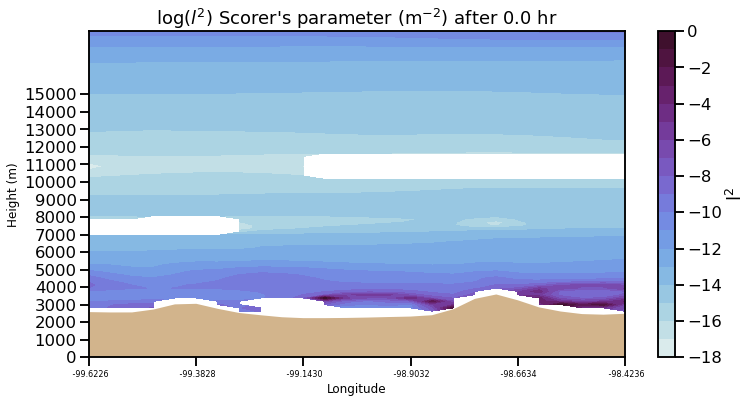

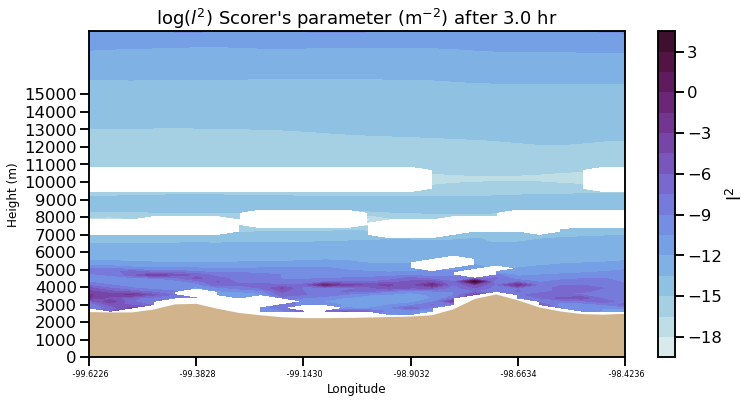

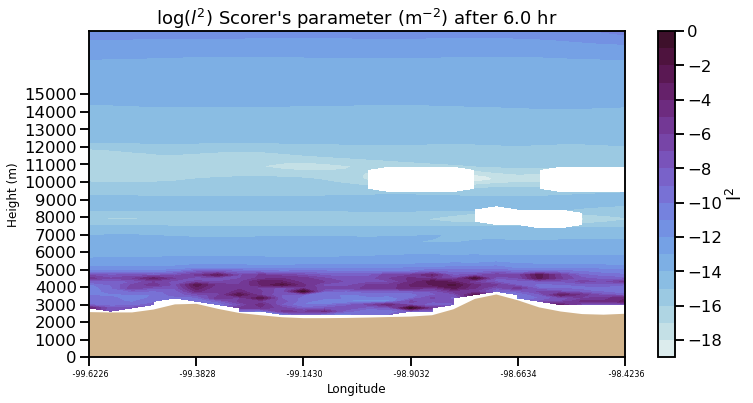

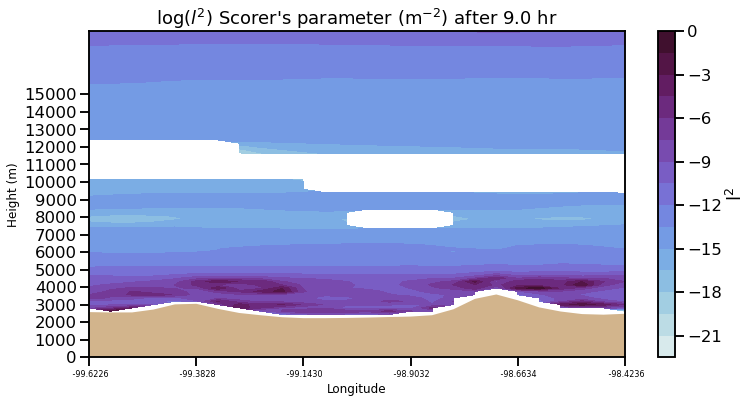

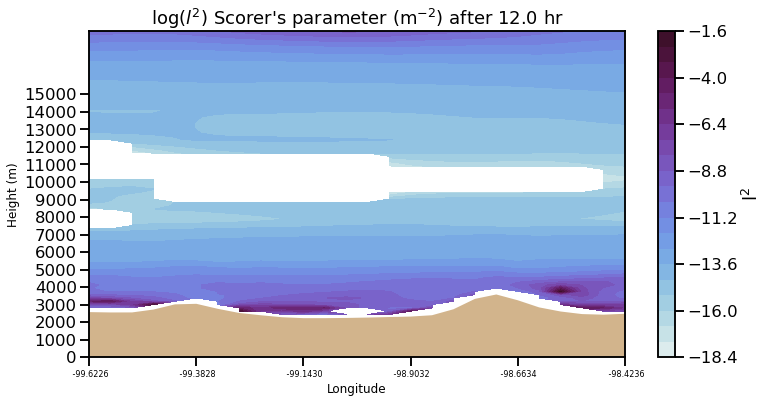

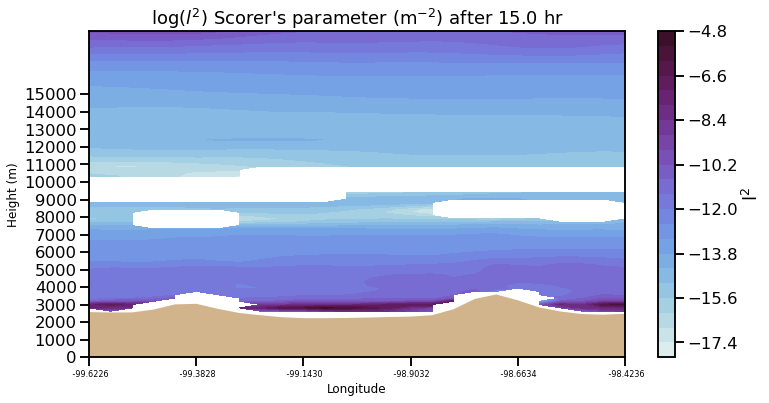

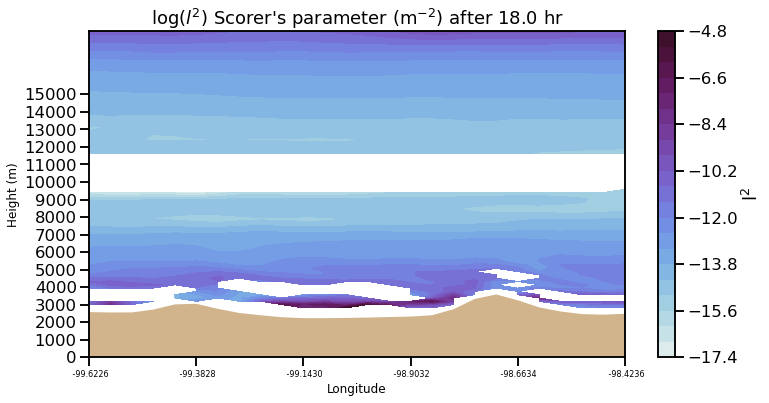

In [24]:
# Grafiquemos Scorer para distintos tiempos
for tind in range(0,21,3):
    
    # Calc Scorer
    N2 = calc_N2(ds.T[tind,:,:,:].data, 290, z[:,:,:] )
    uspd =  getvar(ncfile, "ua", timeidx=tind, units='m s-1')
    l2 = calc_scorer(N2,uspd[:,:,:], z[:,:,:])
    time = getvar(ncfile, "xtimes", timeidx=tind)
    
    # Extract the model height and wind speed
    z = getvar(ncfile, "z")
    wspd =  l2

    # Create the start point and end point for the cross section
    start_point = CoordPair(lat=19.4, lon=-99.6)
    end_point = CoordPair(lat=19.4, lon=-98.4)

    # Compute the vertical cross-section interpolation.  Also, include the
    # lat/lon points along the cross-section.
    wspd_cross = vertcross(np.log(wspd), z[1:-1,...], wrfin=ncfile, start_point=start_point,
                           end_point=end_point, latlon=True, meta=True)

    # Create the figure
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes()

    # Make the contour plot
    xs = np.arange(0, wspd_cross.shape[-1], 1)
    ys = to_np(wspd_cross.coords["vertical"])

    wspd_contours = ax.contourf(xs,ys,to_np(wspd_cross),20, cmap=cmo.cm.dense)

    # Add the color bar
    plt.colorbar(wspd_contours, ax=ax, label='l$^2$')

    # Get the terrain heights along the cross section line
    ter = getvar(ncfile, "ter", timeidx=0)
    ter_line = interpline(ter, wrfin=ncfile, start_point=start_point,
                          end_point=end_point)
    ht_fill = ax.fill_between(xs, 0, to_np(ter_line),
                              facecolor="tan")

    # Set the x-ticks to use latitude and longitude labels.
    coord_pairs = to_np(wspd_cross.coords["xy_loc"])
    x_ticks = np.arange(coord_pairs.shape[0])
    ax.set_xticks(x_ticks[::5])
    x_labels = [pair.latlon_str()[-9:] for pair in to_np(coord_pairs)]

    ax.set_xticklabels(x_labels[::5], rotation=0, fontsize=8)

    # Set the y-ticks to be height.
    vert_vals = to_np(wspd_cross.coords["vertical"])
    ax.set_yticks(np.arange(0, 16000, 1000))

    # Set the x-axis and  y-axis labels
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Height (m)", fontsize=12)

    plt.title("log($l^2$) Scorer's parameter (m$^{-2}$) after %1.1f hr " %(time/60))

    plt.show()

# Intento de mapas quiver de velocidades

Text(0.5, 1.0, 'Nivel vertical 0')

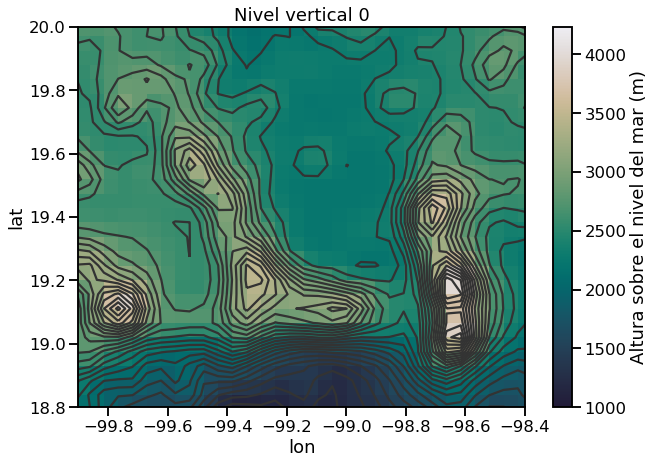

In [25]:
k = 0 # nivel vertical del fondo (el más pegado a la superficie)

# definimos límites colormap
max_hgt = np.nanmax(hght_asl[k,:,:])
min_hgt = 1000


# Datos de la velocidad
z = getvar(ncfile, "z")


# Graficamos altura sobre nivel del mar del nivel k=0 al tiempo t=0.
fig, ax = plt.subplots(1,1, figsize=(10,7))
pc = ax.pcolormesh(ds.XLONG[k,:,:],ds.XLAT[k,:,:], hght_asl[k,:,:], 
                   vmin=min_hgt, vmax = max_hgt, cmap = cmo.cm.rain_r)

plt.colorbar(pc, label='Altura sobre el nivel del mar (m)')
cn = ax.contour(ds.XLONG[k,:,:],ds.XLAT[k,:,:], hght_asl[k,:,:], 
                levels=np.linspace(int(min_hgt),int(max_hgt),30), colors='0.2')

ax.set_xlim(-99.9, -98.4)
ax.set_ylim(18.8, 20)
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_title('Nivel vertical %i' %k)

#X, Y longitud y lat, de data variables sacamos U y V


In [26]:
ds.XLONG[k,:,:].size

42588

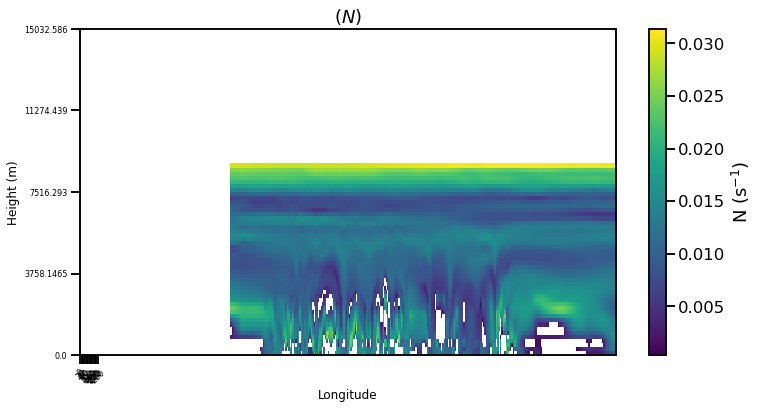

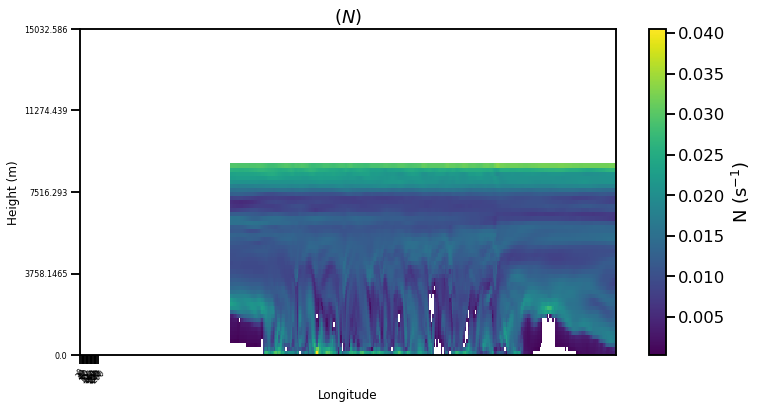

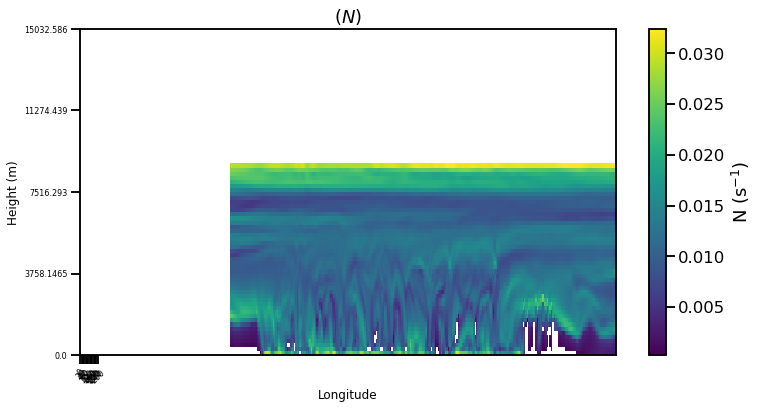

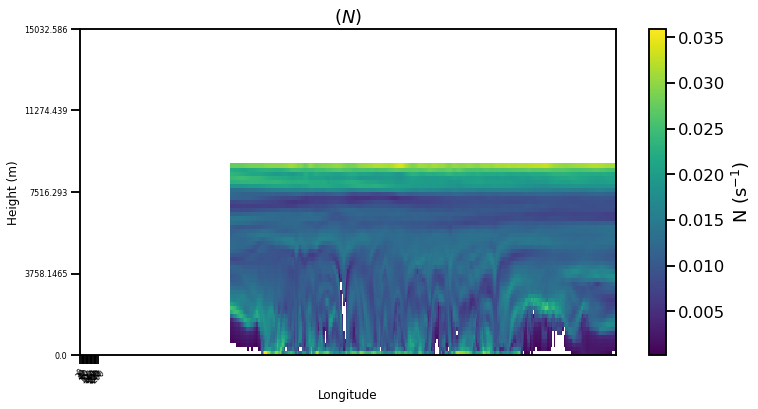

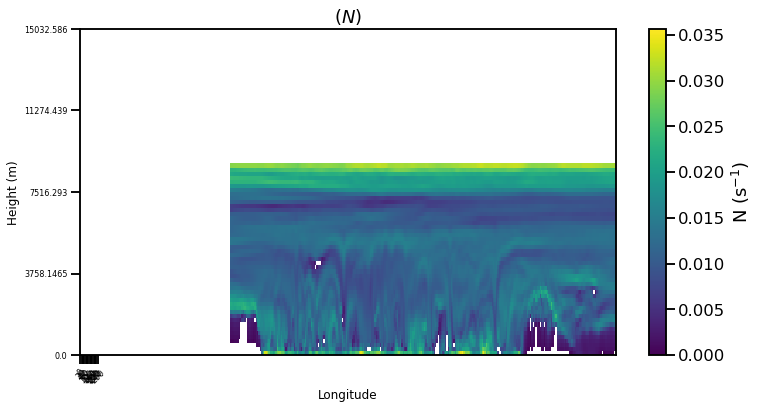

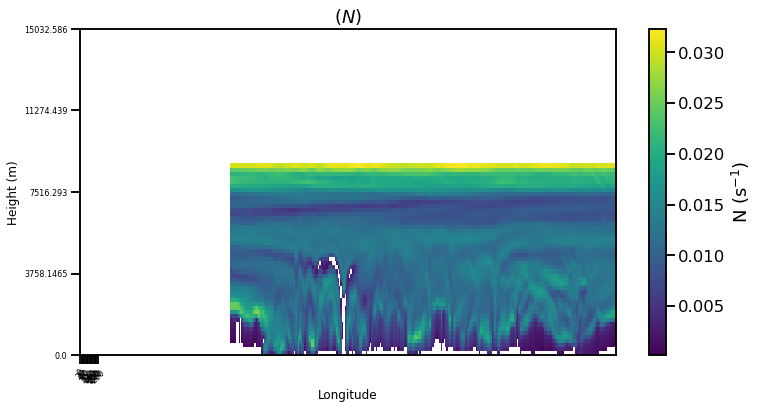

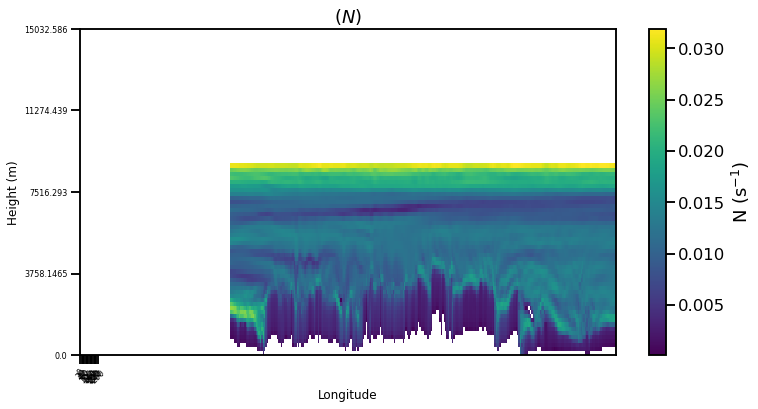

In [27]:
# Grafiquemos Scorer para distintos tiempos
for tind in range(0,21,3):
    
    # Calc Scorer
    N2 = calc_N2(ds.T[tind,:,:,:].data, 290, z[:,:,:] )
    uspd =  getvar(ncfile, "ua", timeidx=tind, units='m s-1')
    l2 = calc_scorer(N2,uspd[:,:,:], z[:,:,:])
    time = getvar(ncfile, "xtimes", timeidx=tind)
    
    # Extract the model height and wind speed
    z = getvar(ncfile, "z")
    wspd =  l2

    # Create the start point and end point for the cross section
    start_point = CoordPair(lat=19.4, lon=-99.6)
    end_point = CoordPair(lat=19.4, lon=-98.4)

    # Compute the vertical cross-section interpolation.  Also, include the
    # lat/lon points along the cross-section.
    wspd_cross = vertcross(np.log(wspd), z[1:-1,...], wrfin=ncfile, start_point=start_point,
                           end_point=end_point, latlon=True, meta=True)

    # Create the figure
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes()
    pc = plt.pcolormesh(np.sqrt(N2[:,ilat,:]))
    plt.colorbar(pc,ax=ax, label='N (s$^{-1}$)')
    
    # Define los x-ticks para usar en latitud y longitud
    
    x_ticks =ds.XLONG[tind,ilat,:].coords["XLONG"]
    x_labels = np.arange(x_ticks.shape[0])
                
    ax.set_xticks(x_ticks[::20])
    ax.set_xticklabels(x_labels[::20], rotation=45, fontsize=8)

    # Define y-ticks para que sean alturas
    vert_vals = to_np(wspd_cross.coords["vertical"])
    v_ticks = np.arange(vert_vals.shape[0])
    ax.set_yticks(v_ticks[::20])
    ax.set_yticklabels(vert_vals[::20], fontsize=8)

    # Set the x-axis and  y-axis labels
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Height (m)", fontsize=12)

    plt.title("($N$)")
    plt.show()

In [ ]:
wspd_cross

In [ ]:
ds.XLONG[0,ilat,:].coords

In [ ]:
def unstagger(ugrid, vgrid):
    """ Interpolate u and v component values to values at grid cell centres (from D.Latornell for NEMO output).
    The shapes of the returned arrays are 1 less than those of
    the input arrays in the y and x dimensions.
    :arg ugrid: u velocity component values with axes (..., y, x)
    :type ugrid: :py:class:`numpy.ndarray`
    :arg vgrid: v velocity component values with axes (..., y, x)
    :type vgrid: :py:class:`numpy.ndarray`
    :returns u, v: u and v component values at grid cell centres
    :rtype: 2-tuple of :py:class:`numpy.ndarray`
    """
    u = np.add(ugrid[..., :-1], ugrid[..., 1:]) / 2
    v = np.add(vgrid[..., :-1, :], vgrid[..., 1:, :]) / 2
    return u, v
